### Treść zadania

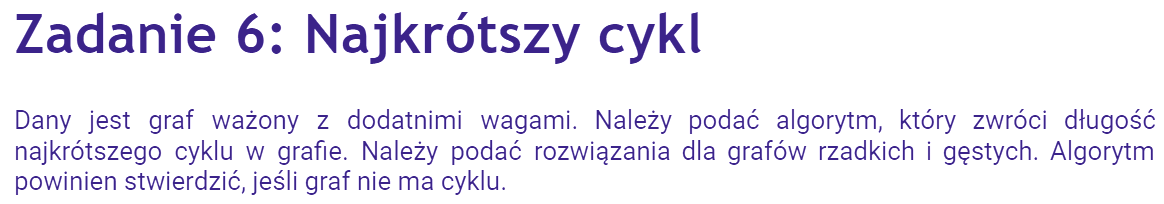

# Omówienie możliwych rozwiązań

Znowu mamy powiedziane, że graf ma dodatnie wagi krawędzi, więc pierwsze, co powinno przyjść nam na myśl, to jak do tego problemu zaadaptować algorytm Dijkstry. Ponieważ również mamy powiedziane, że należy zaproponować algorytm dla grafów gęstych oraz rozważyć inne rozwiązanie dla grafów rzadkich, nasze podejście może się różnić w zależności od reprezentacji grafu.

# Dla grafów rzadkich

## Jedyny rozsądny sposób - Dijkstra

### Omówienie rozwiązania

Przez grafy rzadkie rozumiemy takie grafy, w których można przyjąć, że $ O(E) = O(V) (E \approx V) $. Wówczas najlepszą reprezentacją grafu jest zapisanie grafu w postaci list sąsiedztwa. Ponieważ wiemy dodatkowo, że każda krawędź ma dodatnią wagę, nalepszy będzie algorytm Dijkstry. Będziemy postępować tak, że z każdego wierzchołka na nowo rozpoczniemy przeglądanie grafu algorytmem Dijkstry, szukając dla każdego z nich dwóch najkrótszych ścieżek, które zaczynają się w danym wierzchołku startowym $ s $ i obie kończą się w tym samym wierzchołku różnym od $ s $. (Jest to podejście nieco inne niż w zaprezentowanym wyżej algorytmie, ale myślę, że nieco łatwiejsze w implementacji). Ponieważ w algorytmie Dijkstry z kolejki zawsze ściągamy wierzchołek z najmniejszą odległością ścieżki, w pierwszej kolejności zastąpimy wpisaną początkowo wartość $ \infty $ przez długość najkrótszej ścieżki. Jeżeli później ponownie natrafimy na ścieżkę, która prowadzi z wierzchołka $ s $ do przetworzonego już wcześniej wierzchołka, sprawdzimy, czy długość tej ścieżki dodana do długości najkrótszej ścieżki (czyli długość cyklu - złączonych dwóch ścieżek) jest mniejsza od najmniejszej zapisanej długości ścieżki. Jeżeli tak, to nadpisujemy zapisaną długość, a jeżeli nie, to pomijamy znaleziony cykl.
<br><br>
Dziwne może się wydawać to, że nie uwzględniamy faktu, iż obie ścieżki mogą się częsciowo pokrywać i tak naprawdę nie utworzą cyklu, który zawiera wierzchołek startowy $ s $, ale cykl pojawi się gdzieś dalej w grafie (mam na myśli sytuację tego typu):
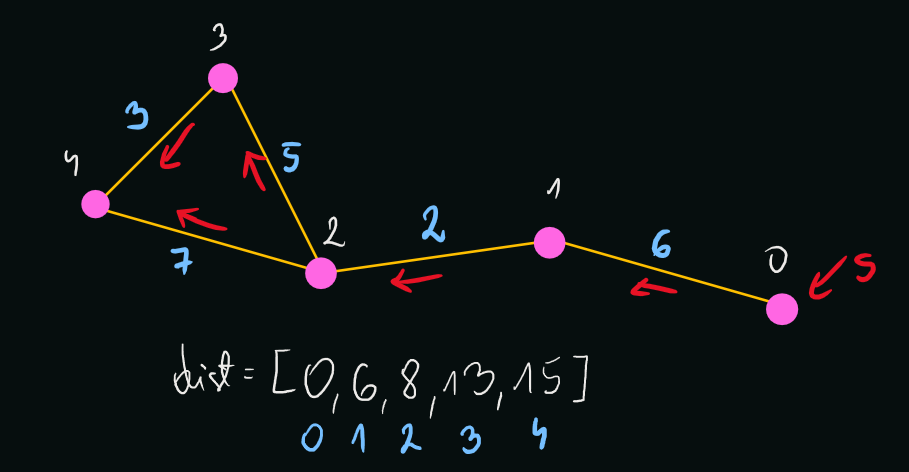
\* Te niebieskie liczby pod tablicą na ilustracji to są indeksy wierzchołków, którym odpowiadają wartości (długości najkrótszych ścieżek) w tablicy.
<br><br>
Zauważmy, że jeżeli znajdziemy najkrótsze ścieżki z $ s = 0 $ do $ 3 $ i z $ s = 0 $ do $ 4 $, wówczas, dokonując relaksacji z wierzchołka $ 3 $ (bo dla niego ścieżka jest krótsza niż dla $ 4 $), sprawdzimy wierzchołek $ 4 $, dla którego już istnieje najkrótsza ścieżka. Wtedy nasz algorytm uznałby za cykl złączone ścieżki z $ 0 $ do $ 3 $, z $ 0 $ do $ 4 $ plus krawędź z $ 3 $ do $ 4 $. Nie musimy jednak się tym martwić. Możemy zaktualizować długość najkrótszego cyklu, jeżeli $ dist[3] + dist[4] + weight(3, 4) $ ma wartość mniejszą niż długość poprzednio najkrótszego cyklu. Nasze błędne oszacowanie zostanie wykryte w którejś z kolejnych iteracji i tak sukcesywnie będziemy zapisywać coraz mniejsze wagi, aż nasz algorytm wystartuje z wierzchołka, który leży na najkrótszym cyklu (a wiemy, że taki wierzchołek istnieje, jeżeli istnieje najkrótszy cykl - tak naprawdę, to są takie co najmniej 2 wierzchołki). Wówczas algorytm wyznaczy 2 najkrótsze ścieżki, które spotkają się w innym wierzchołku, który leży na tym najkrótszym cyklu. Np. dla powyższego przykładu, jeżeli wywołamy algorytm Dijkstry z wierzchołka o indeksie $ 2 $, (lub $ 3 $ albo $ 4 $), to znajdziemy zawsze ten sam cykl o najmniejszej wadze, czyli $ 2 - 3 - 4 $ (tu akurat jest to jedyny cykl, ale to tylko przykład). Zauważmy również, że skoro cykl znajdziemy dla dowolnego z wierzchołków, które leżą na tym najkrótszym cyklu, a rezultatem każdego wywołania algorytmu jest znalezienie najkrótszych cykli (a dokładniej kandydatów na cykle, bo w przypadku przedstawionej na rysunku wyżej sytuacji, trudno mówić o cyklu, który przechodzi przez wierzchołek startowy), możemy usuwać z grafu wierzchołki, z których poprzednio rozpoczynaliśmy poszukiwanie cykli. Wynika to stąd, że dla każdego wierzchołka znaleźliśmy już wszystkie najkrótsze ścieżki do wszystkich innych wierzchołków, więc również, jeżeli dany wierzchołek startowy należał do najkrótszego cyklu, to wykryliśmy także ten cykl, który przez niego przechodził, więc już więcej nie ma sensu badać tego wierzchołka. Jest to usprawnienie, które nie poprawia złożoności, ale w rzeczywistości może znacznie przyspieszyć działanie algorytmu.
###### UWAGA
Jeżeli w grafie mogłyby się znaleźć również krawędzie o wadze $ 0 $, musielibyśmy uwzlędnić taką sytuację:
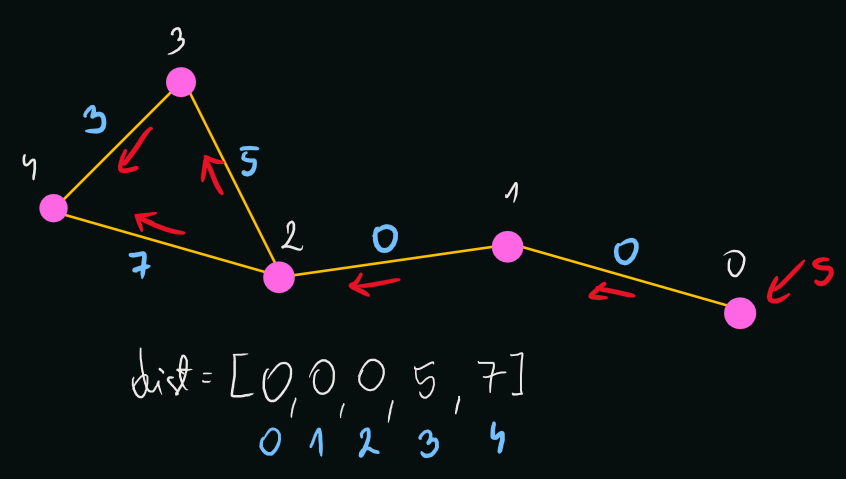
Wówczas startując algorytm z dowolnego wierzchołka (to nie jest reguła, ale tak akurat jest w tym przykładzie) (ogólna zasada - istniałoby kilka takich wierzchołków, z których najkrótsze ścieżki do wszystkich innych wierzchołków miałyby takie same najmniejsze wagi - mam na myśli to, że dla obu wierzchołków z końca krawędzi o wadze 0 mielibyśmy takie same odległości do wszystkich pozostałych wierzchołków) otrzymalibyśmy tę samą znalezioną długość kandydata na cykl. W przypadku tego zadania nie jest to problemem, bo my wyznaczamy tylko długość, ale w przypadku chęci odtwarzania rozwiązania, mielibyśmy spory problem, bo jako wierzchołek, który należy do cyklu o najmniejszej długości, wliczony zostałby wierzchołek $ 0 $. Wtedy najlepiej jest zastosować algorytm Dijkstry, który wykorzystuje koncepcję wyznaczania najkrótszych ścieżek w grafach nieważonych, a więc jeżeli istniałoby kilka rozwiązań, to zawsze wybieralibyśmy to, w którym cykl o takiej samej sumarycznej dlugości składałby się z mniejszej liczby krawędzi. W taki sposób odrzucilibyśmy wszystkie ścieżki o zerowych wagach.
###### UWAGA
Poniższa implementacja działa zarówno dla grafów nieskierowanych jak i dla skierowanych.

### Złożoność

###### Obliczeniowa:
$ O(VE \cdot log(V)) $, ale $ O(E) = O(V) $ (dla grafów rzadkich), więc otrzymujemy $ O(V^2 \cdot log(V)) $
###### Pamięciowa:
$ O(V) $ - przyjmuję, że graf jest dany i nie wliczam go do złożoności

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Limit space required to the number of vertices to consider in the 
    # remaining graph
    weights = [inf] * (n - s)
    min_length = inf
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u - s]:
            weights[u - s] = min_w
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                # Treat all vertices of an index lower than s as banned
                # (we cannot visit them as they were previously starting
                # points)
                if v == parent or v <= s: continue
                pq.put((min_w + weight, v, u))
        # Otherwise, we have a cycle somewhere on the way to the u vertex
        else:
            min_length = min(min_length, min_w + weights[u - s])
                
    return min_length


def min_cycle(G: 'graph represented by adjacency lists'):
    n = len(G)
    inf = float('inf')
    min_length = inf
    for i in range(n):
        min_length = min(min_length, dijkstra(G, i))
    return min_length if min_length < inf else None

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

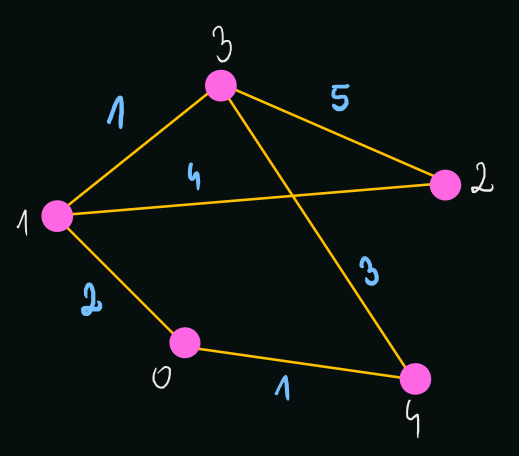

In [3]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_list(E)

print(min_cycle(G))

7


### (Dodatkowo) Odtwarzanie rozwiązania

Wykorzystuję osobną funkcję opartą na algorytmie Dijkstry, aby nieporzebnie nie spowalniać i nie komplikować funkcji, która jedynie wszukuje długość cyklu. I tak najlepszym rozwiązaniem jest odtworzenie cyklu o najmniejszej wadze w taki sposób, że jeszcze raz przejdziemy po grafie algorytmem Dijkstry, ale tym razem wiemy, że dla danego wierzchołka otrzymaliśmy minimalną wagę, więc istnieje jakiś cykl, jeżeli zapisana minimalna waga (długość) jest mniejsza od $ \infty $ i przechodzi on przez wierzchołek, w którym rozpoczęliśmy poszukiwanie cyklu (bo tylko wtedy otrzymujemy najmniejszą sumaryczną wagę dwóch ścieżek, które zaczynają się w tym samym wierzchołku i kończą się w tym samym innym od początkowego wierzchołku). Z tego powodu, po natrafieniu na pierwszy cykl, kończymy działanie algorytmu Dijkstry, który odtwarza cykl i łączymy w odpowiedniej kolejności wierzchołki z obu ścieżek, tworzące cykl.
###### UWAGA
Poniższa implementacja działa zarówno dla grafów nieskierowanych jak i dla skierowanych.

##### Kod:

In [4]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Limit space required to the number of vertices to consider in the 
    # remaining graph
    weights = [inf] * (n - s)
    min_length = inf
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u - s]:
            weights[u - s] = min_w
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                # Treat all vertices of an index lower than s as banned
                # (we cannot visit them as they were previously starting
                # points)
                if v == parent or v <= s: continue
                pq.put((min_w + weight, v, u))
        # Otherwise, we have a cycle somewhere on the way to the u vertex
        else:
            min_length = min(min_length, min_w + weights[u - s])
                
    return min_length


def restore_cycle(parents, u, v):
    cycle = []
    
    def recur(x):
        if parents[x] is not None:
            recur(parents[x])
        cycle.append(x)
        
    recur(u)
    
    while parents[v] is not None:
        cycle.append(v)
        v = parents[v]
        
    return cycle


def get_min_cycle(G, s):
    n = len(G)
    inf = float('inf')
    # As before we can limit memory only to these vertices which can
    # be included in the min cycle
    weights = [inf] * (n - s)
    parents = [None] * (n - s)
    pq = PriorityQueue()
    pq.put((0, s, None))
    last_u = None
    
    while not pq.empty():
        min_w, u, parent = pq.get()
        
        if min_w < weights[u - s]:
            weights[u - s] = min_w
            parents[u - s] = parent
            for v, weight in G[u]:
                if v == parent or v <= s or weights[v - s] < inf: continue
                pq.put((min_w + weight, v, u))
        # We found a desired cycle
        else:
            last_u = parent
            last_v = u
            break
            
    return last_u and restore_cycle(parents, last_u, last_v)


def min_cycle(G: 'graph represented by adjacency lists'):
    n = len(G)
    inf = float('inf')
    min_length = inf
    min_s = None
    
    for s in range(n):
        curr_min = dijkstra(G, s)
        if curr_min < min_length:
            min_length = curr_min
            min_s = s
            
    return (min_length, get_min_cycle(G, min_s)) if min_length < inf else (None,) * 2

###### Kilka testów

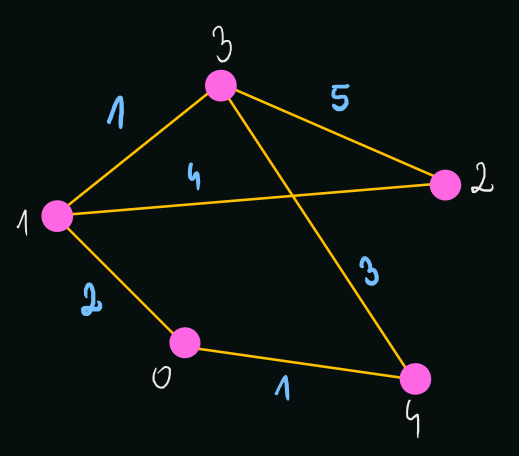

In [5]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_list(E)

print(min_cycle(G))

(7, [0, 4, 3, 1])


# Dla grafów gęstych

## Algorytm I (Dijkstra)

### Omówienie

Algorytm ten jest niceo bardziej skomplikowany w implementacji, ponieważ wykrozystuje on algorytm Dijkstry, który działa dla macierzy w czasie $ O(V^2) $. Jeżeli chodzi o ideę, to jest ona taka sama, jak w przypadku powyższego algorytmu.
###### UWAGA
Poniższa implementacja działa zarówno dla grafów nieskierowanych jak i dla skierowanych.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $
###### Pamięciowa:
$ O(V) $ - przyjmuję, że graf jest dany i nie wliczam go do złożoności

### Implementacja

In [6]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(s, n):
    head = Node()
    tail = head
    for i in range(s, n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights, s):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx - s] < weights[min_prev.next.idx - s]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(s, n)
    weights    = [inf] * (n - s)
    parents    = [None] * (n - s)
    min_length = inf
    weights[0] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights, s)
        # Break if there are no more vertices to visit
        if u is None: break
        # Iterate over the vertex's neighbours and update weights of the paths
        for v in range(s + 1, n):
            # Skip if no edge (-1 means not edge)
            if G[u][v] == -1 or parents[u - s] == v: continue
            # Update the weight of a path to the vertex v if found a better one
            if weights[u - s] + G[u][v] < weights[v - s]:
                weights[v - s] = weights[u - s] + G[u][v]
                parents[v - s] = u
            else:
                curr_length = weights[v - s] + weights[u - s] + G[u][v]
                
                if curr_length < min_length:
                    min_length = curr_length
                
    return min_length


def min_cycle(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    min_length = inf
    for i in range(n):
        min_length = min(min_length, dijkstra(G, i))
    return min_length if min_length < inf else None

###### Kilka testów

##### Pomocnicze

In [7]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

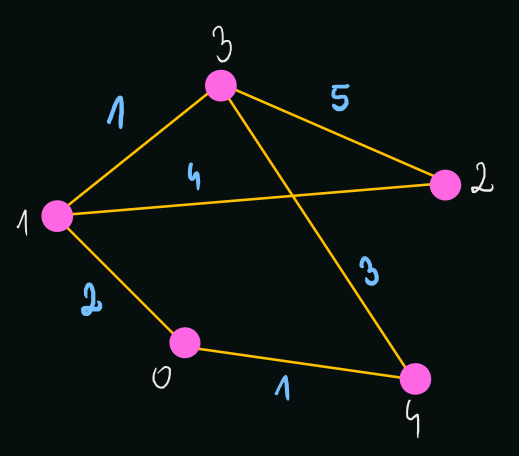

In [8]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_matrix(E)

print(min_cycle(G))

7


### (Dodatkowo) Odtwarzanie cyklu

In [9]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(s, n):
    head = Node()
    tail = head
    for i in range(s, n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights, s):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx - s] < weights[min_prev.next.idx - s]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(s, n)
    weights    = [inf] * (n - s)
    parents    = [None] * (n - s)
    min_length = inf
    weights[0] = 0  # weights[s - s] = weights[0]
    last_u = last_v = None
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights, s)
        # Break if there are no more vertices to visit
        if u is None: break
        # Iterate over the vertex's neighbours and update weights of the paths
        for v in range(s + 1, n):
            # Skip if no edge (-1 means not edge)
            if G[u][v] == -1 or parents[u - s] == v: continue
            # Update the weight of a path to the vertex v if found a better one
            if weights[u - s] + G[u][v] < weights[v - s]:
                weights[v - s] = weights[u - s] + G[u][v]
                parents[v - s] = u
            else:
                curr_length = weights[v - s] + weights[u - s] + G[u][v]
                if curr_length < min_length:
                    min_length = curr_length
                    last_u = u
                    last_v = v
                
    return min_length, parents, last_u, last_v


def restore_cycle(parents, u, v):
    cycle = []
    
    def recur(x):
        if parents[x] is not None:
            recur(parents[x])
        cycle.append(x)
        
    recur(u)
    
    while parents[v] is not None:
        cycle.append(v)
        v = parents[v]
        
    return cycle


def min_cycle(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    min_length = inf
    res_u = res_v = None
    parents = []
    
    for i in range(n):
        curr_length, curr_parents, last_u, last_v = dijkstra(G, i)
        if curr_length < min_length:
            min_length = curr_length
            parents = curr_parents
            res_u = last_u
            res_v = last_v
            
    return (min_length, restore_cycle(parents, res_u, res_v)) if min_length < inf else (None,) * 2

###### Kilka testów

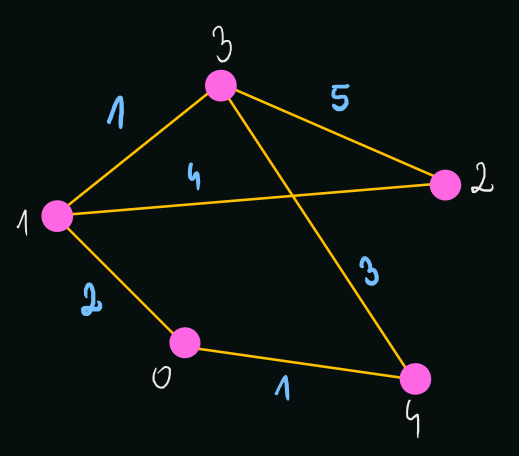

In [10]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_matrix(E)

print(min_cycle(G))

(7, [0, 1, 3, 4])


## Algorytm II (Floyd-Warshall)

### Omówienie

Algorytm ten jest dużo lepszym wyborem dla grafów reprezentowanych macierzowo (zwykle grafów pełnych), ponieważ jest znacznie mniej skomplikowany w implementacji od powyższych implementacji algorytmu Dijkstry, a także pozwala na istnienie krawędzi o ujemnych wagach, przez co możliwe jest, że rozwiązaniem będzie ujemny cykl. My tego nie uwzględniamy w poniższej implementacji, ponieważ mamy powiedziane, że wagi krawędzi są dodatnie.
<br><br>
Idea algorytmu jest następująca. Przed każdą relaksacją wierzchołka (mam na myśli poniższy fragment kodu w algorytmie Floyda-Warshalla):

    if W[i][t] + W[t][j] < W[i][j]:
        W[i][j] = W[i][t] + W[t][j]

będziemy sprawdzać, czy nowa długość ścieżki z $ i $ do $ j $ plus zapisana poprzednio długość najkrótszej ścieżki z $ s $ do $ j $ daje nam najmniejszą sumaryczną wartość. Jest to idea podobna do tej, zaprezentowanej w przypadku algorytmu Dijkstry powyżej, ponieważ takie sprawdzenie dwóch ścieżek, które po połączeniu mogą tworzyć cykl (ale znów nie muszą, bo mogą się one pokrywać), pozwala nam znaleźć minimalną łączną długość, która będzie odpowiadała cyklowi o najmniejszej długości. Ponieważ wiemy, że skoro udało nam się znaleźć przynajmniej dwie różne ścieżki do danego wierzchołka, to taki cykl musi istnieć, a skoro również wagi krawędzi są dodatnie, szukany cykl znajdziemy, gdy otrzymamy minimalną sumę dwóch ścieżek. W takiej sytuacji mamy pewność, że jest to cykl, a obie ścieżki się nie pokrywają, bo gdyby się pokrywały, to łączna waga (długość) byłaby większa.
###### Dlaczego sprawdzamy długość ścieżki przed relaksacją?
Robimy tak dlatego, że może się zdarzyć sytuacja, w której za pierwszym razem wyznaczymy najkrótszą ścieżkę między parą wierzchołków i tak naprawdę nigdy nie będziemy modyfikować już wartości, która odpowiada jej długości. Wtedy nie zauważylibyśmy innych istniejących ścieżek między daną parą wierzchołków.
<br><br>
Najważniejszy w implementacji jest poniższy fragment kodu:

    if B[i][j] != t and not (B[i][j] is B[j][i] is None) and i != j:
        min_length = min(min_length, curr_w + W[i][j])

Ten dziwny warunek sprawdza, czy mamy cykl. Sprawdzamy zatem, czy bieżący wierzchołek $ t $ na ścieżce z $ i $ do $ j $ jest różny od zapisanego wierzchołka $ t $ (pole $ B[i][j] $) dla najkrótszej ścieżki z $ i $ do $ j $ oraz, czy nie ma takiego przypadku, że jednocześnie ścieżka z $ i $ do $ j $ i z $ j $ do $ i $ nie mają wierzchołków pośrednich (tzn. obie ścieżki składają się jedynie z pary wierzchołków połączonych krawędzią - takiej sytuacji nie chcemy, bo w grafie nieskierowanym oznaczałoby to, że się cofnęliśmy tą samą krawędzią, którą przyszliśmy, a to nie jest możliwe). Sprawdzamy również, czy $ i \neq j $, ponieważ nie chcemy ścieżek, które składają się tylko z jednego wierzchołka, bo takie ścieżki nie dadzą nam cyklu.

###### UWAGA
Poniższa implementacja działa tylko dla grafów nieskierowanych. Jeżeli algorytm miałby działać dla grafów skierowanych, wystarczy usunąć sprawdzanie poniższego warunku:

    (B[i][j] is B[j][i] is None)

Wynika to stąd, że wówczas możemy przejść spowrotem z $ j $ do $ i $, ponieważ obie krawędzie są traktowane jako różne krawędzie.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $
###### Pamięciowa:
$ O(V) $ - przyjmuję, że graf jest dany i nie wliczam go do złożoności

### Implementacja

In [11]:
import copy


def min_cycle(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    # B[i][j] - a vetrex on the shortest path from i to j
    # for which a path has the lowest total weight (length)
    B = [[None] * n for _ in range(n)]
    
    min_length = inf
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                curr_w = W[i][t] + W[t][j]
                if B[i][j] != t and not (B[i][j] is B[j][i] is None) and i != j:
                    min_length = min(min_length, curr_w + W[i][j])
                if curr_w < W[i][j]:
                    W[i][j] = curr_w
                    B[i][j] = t
                
    return min_length if min_length < inf else None

###### Kilka testów

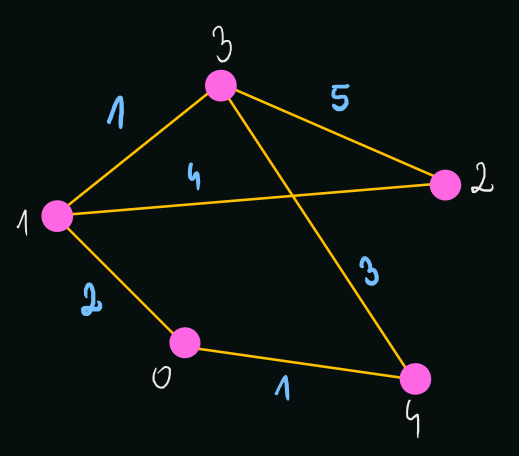

In [12]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_matrix(E)

print(min_cycle(G))

7


### (Dodatkowo) Odtwarzanie rozwiązania

In [13]:
import copy


def reconstruct_cycle(B, i, j, t):
    cycle = []
    
    def recur(i, j):
        if B[i][j] is None:
            return cycle.append(i)
        recur(i, B[i][j])
        recur(B[i][j], j)
        
    recur(i, j)  # Rebuild the shortest path from i to j
    recur(j, t)  # Rebuild the shortest path from j to t
    recur(t, i)  # Rebuild the shortest path from t to i
    
    return cycle


def min_cycle(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    # B[i][j] - a vetrex on the shortest path from i to j
    # for which a path has the lowest total weight (length)
    B = [[None] * n for _ in range(n)]
    
    min_length = inf
    best_i = best_j = best_t = None
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                curr_w = W[i][t] + W[t][j]
                
                if B[i][j] != t and not (B[i][j] is B[j][i] is None) and i != j:
                    if curr_w + W[i][j] < min_length:
                        best_i = i
                        best_j = j
                        best_t = t
                        min_length = curr_w + W[i][j]
                        
                if curr_w < W[i][j]:
                    W[i][j] = curr_w
                    B[i][j] = t
                
    return (min_length, reconstruct_cycle(B, best_i, best_j, best_t)) if min_length < inf else (None,) * 2

###### Kilka testów

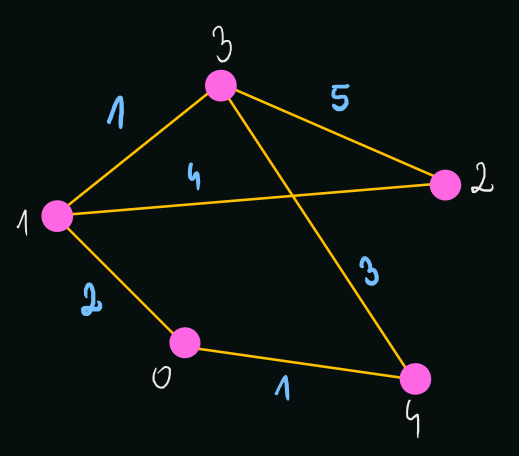

In [14]:
E = [(0, 1, 2), (0, 4, 1), (1, 3, 1), (2, 1, 4), (2, 3, 5), (4, 3, 3)]
G = undirected_weighted_graph_matrix(E)

print(min_cycle(G))

(7, [1, 0, 4, 3])
